# Kmeans Clustering


Shilpi Ghosal

In [18]:
#Loading important libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
import sklearn.datasets as datasets
from sklearn.metrics import accuracy_score


In [11]:
#Loading iris dataset
iris=datasets.load_iris()
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [7]:
#checking for null values
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

# Training the model

In [15]:
#Training the model 
X=df.iloc[:,:-1].values
a=[]
for k in range(1,11):
    kmeans = KMeans(n_clusters = k, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    a.append(kmeans.inertia_)
print('Training Done')     

Training Done


# Plotting the no. of clusters formed

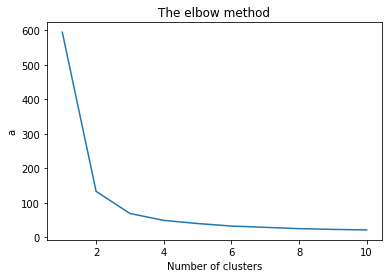

In [13]:
#Plotting the graph of no. of optimal clusters formed
plt.plot(range(1, 11), a)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('a') 
plt.show()   

In [9]:
#From the graph, it is visible that K =3 should be taken.
kmeans = KMeans(n_clusters = 3, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
y=kmeans.fit_predict(X)

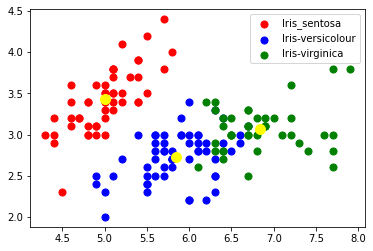

In [10]:
#Plotting the clusters along with the centroids
plt.scatter(X[y==0,0],X[y==0,1],s=50,c='red',label='Iris_sentosa')
plt.scatter(X[y == 1, 0], X[y == 1, 1], s = 50, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y == 2, 0], X[y == 2, 1],s = 50, c = 'green', label = 'Iris-virginica')
plt.legend()
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')